In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sympy as sym
from IPython.display import display,Math
import warnings

**Here is a list of common Python string format specifiers:<br>**

%s : String (converts any Python object using str())<br>
%r : String (converts any Python object using repr())<br>
%c : Character<br>
%d : Decimal Integer<br>
%i : Integer<br>
%u : Unsigned decimal integer<br>
%o : Octal integer<br>
%x : Hexadecimal integer (lowercase letters)<br>
%X : Hexadecimal integer (uppercase letters)<br>
%e : Floating point exponential format (lowercase 'e')<br>
%E : Floating point exponential format (uppercase 'E')<br>
%f : Floating point decimal format<br>
%F : Floating point decimal format<br>
%g : Either %f or %e, depending on the size of the number<br>
%G : Either %F or %E, depending on the size of the number<br>
%% : A literal '%' character<br>

# <font color="red">**Limits**</font>

In [2]:
x = sym.symbols("x")
fx = x**3
lim_pnt = 1.5


lim = sym.limit(fx, x, lim_pnt)
display(Math("\\lim_{x\\to%g} %s = %g" %(lim_pnt,sym.latex(fx),lim)))

<IPython.core.display.Math object>

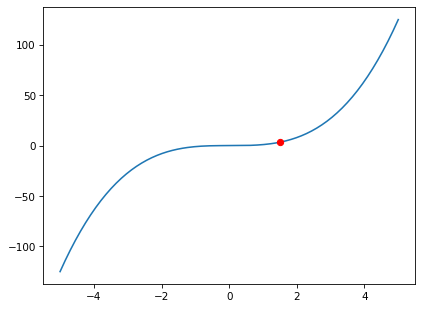

In [3]:
fxx = sym.lambdify(x,fx)
xx = np.linspace(-5,5,200)

plt.plot(xx, fxx(xx)); ##x**3
plt.plot(lim_pnt,lim,"ro");

In [4]:
fxx(2), fxx(1.5)

(8, 3.375)

**another lim example**

<IPython.core.display.Math object>

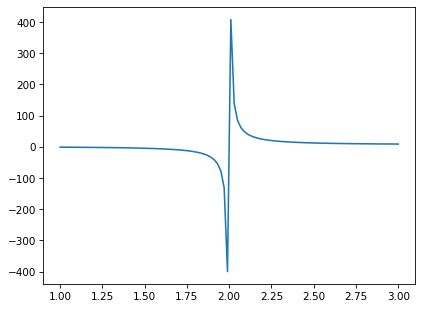

In [5]:
fx = (x**2)/(x-2)
fxx = sym.lambdify(x,fx)
xx = np.linspace(1,3,102)

lim_pnt = 2
lim = sym.limit(fx,x,lim_pnt, dir="-")
#print(lim)

plt.plot(xx,fxx(xx))
display(Math("\\lim_{x\\to%g^-} %s = %g" %(lim_pnt,sym.latex(fx),lim)))

**Limits exercises**

$$ f(x) = e^{-x} \sqrt{x+1} $$
$$ g(x) = cos(x + sin(x)) $$

Demonstrate that:

$$ \frac{\lim_{x\to5}f(x)}{\lim_{x\to5}g(x)} = \lim_{x\to5}\frac{f(x)}{g(x)} $$

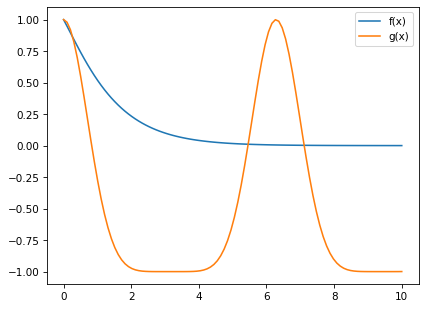

In [6]:
fx = sym.exp(-x) * sym.sqrt(x+1)
fxx = sym.lambdify(x,fx) #Convert a SymPy expression into a function that allows for fast numeric evaluation

gx = sym.cos(x + sym.sin(x))
gxx = sym.lambdify(x,gx)

xx = np.linspace(0,10,100)

plt.plot(xx,fxx(xx), label="f(x)")
plt.plot(xx,gxx(xx), label="g(x)");
plt.legend();

In [7]:
lim_pnt = 5
right_lim = sym.limit(fx/ gx,x,lim_pnt) 
left_lim = sym.limit(fx,x,lim_pnt) / sym.limit(gx,x,lim_pnt) 

left_lim == right_lim

True

# <font color="red">**Piece-wise Function**</font>

$$ f(x) = \begin{cases} 0, & x\leq0 \\ -2x, & x > 0 \text{ and } x < 10 \\ 0.1x^3, & x\geq 10 \end{cases} $$

In [8]:
x = sym.symbols("x")

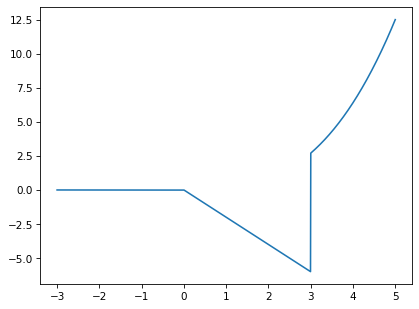

In [9]:
piece1 = 0
piece2 = -2*x
piece3 = 0.1*x**3

fx = sym.Piecewise((piece1,x<=0),(piece2, (x>0) & (x<3)), (piece3, x>=3))

fxx = sym.lambdify(x,fx)
xx = np.linspace(-3,5,1234)

plt.plot(xx,fxx(xx));

In [10]:
print(sym.latex(fx))
fx

\begin{cases} 0 & \text{for}\: x \leq 0 \\- 2 x & \text{for}\: x < 3 \\0.1 x^{3} & \text{otherwise} \end{cases}


Piecewise((0, x <= 0), (-2*x, x < 3), (0.1*x**3, True))

**Exercise**

$$ f(x) = \begin{cases} x^3, & for x\leq 0 \\ log_{2}(x), & \text{otherwise} \end{cases} $$

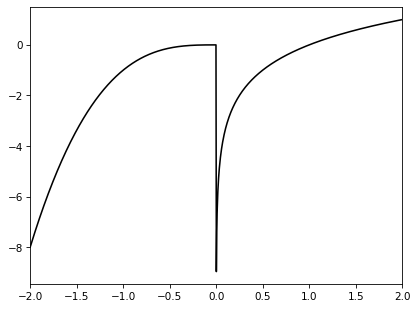

In [11]:
warnings.filterwarnings("ignore")

x = sym.symbols("x")

piece1 = x**3
piece2 = sym.log(x,2)

fx = sym.Piecewise( (piece1,x<=0) , (piece2, (x>0)) )
fxx = sym.lambdify(x, fx)
                   
xx = np.linspace(-2,2, 1002)

#with plt.xkcd():
plt.plot(xx,fxx(xx),"k");
plt.xlim([-2,2]);

In [12]:
warnings.filterwarnings("default")

# <font color="red">**Derivatives**</font>

$$ \text{Examples:} $$

$$ \frac{d}{dx}x^2 = 2x^1 $$
$$$$
$$ \frac{d}{dx}x^3 = 3x^2 $$
$$$$
$$ \frac{d}{dx}3x^2 = 9x^2 $$
$$$$
$$ \text{General Chain rule: } $$
$$ \frac{d}{dx}({\color{red}a}x^{\color{green}n}) = {\color{green}n}{\color{red}a}x^{\color{green}n-1} $$

In [13]:
x = sym.symbols("x")

fx = x**2
sym.diff(fx)

2*x

In [14]:
# Leibniz notation
display(Math('f(x) = %s, \\quad \\frac{df}{dx} = %s' %(sym.latex(fx),sym.latex(sym.diff(fx)))))

# Lagrange notation
display(Math('f(x) = %s, \\quad f\' = %s' %(sym.latex(fx),sym.latex(sym.diff(fx)))))

# Newton notation
display(Math('f(x) = %s, \\quad \\ddot{f} = %s' %(sym.latex(fx),sym.latex(sym.diff(sym.diff(fx))))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

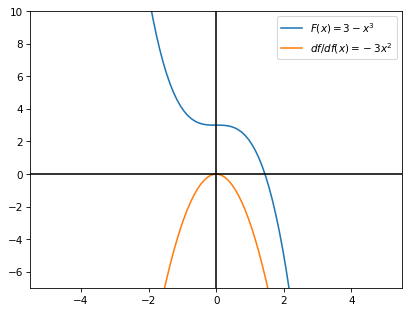

In [15]:
fx = 3 - x**3
dfx = sym.diff(fx)

xx = np.linspace(-5,5,100)

fxx = sym.lambdify(x,fx)
dfxx = sym.lambdify(x,dfx)

plt.plot(xx,fxx(xx),label=f"$F(x) = {sym.latex(fx)}$");
plt.plot(xx,dfxx(xx), label=f"$df/df(x) = {sym.latex(dfx)}$");
plt.axhline(0, color='black')
plt.axvline(0, color='black');
plt.ylim([-7,10]);
plt.legend();

**Exercise of derivatis**

Demonstrate the "product rule" and "summation rule" of derivatives

$$ (f + g)' = f' + g' \text{(summation rule)}$$
$$ (f\times g)' \neq f'\times g \text{ (this can't be done)}$$
$$ (f\times g)' = f'\times g + f\times g' \text{ (Product rule)}$$
$$$$
$$ f(x) = 3 + 2x - 5x^2 + 7x^4 $$
$$ g(x) = 4x^2 + x^5 $$

In [16]:
x = sym.symbols("x")

fx = 3 + 2*x - 5*x**2 + 7*x**4
gx = 4*x**2 + x**5

dfx = sym.diff(fx)
dgx = sym.diff(gx)


#Summation rule
print(sym.diff(fx + gx) == (dfx + dgx))

#Product rule
sym.diff(fx * gx) == (dfx * gx + fx * dgx)

True


True

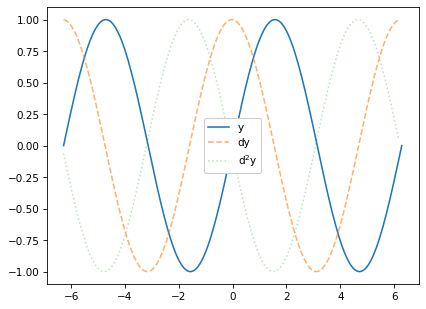

In [17]:
# show the first and second derivatives of sin(x)
x = np.linspace(-2*np.pi,2*np.pi,200)
dt = np.diff(x[0:2])

y = np.sin(x)
dy = np.diff(y) /dt
ddy = np.diff(y,2) /dt/dt

plt.plot(x,y,label='y')
plt.plot(x[0:-1],dy,'--',label='dy',alpha=.6)
plt.plot(x[0:-2],ddy,':',label='d$^2$y',alpha=.3)

plt.legend(framealpha=1)
plt.show()

**Derivatives of trigs Functions**

$$ cos(x)' = -sin(x) $$
$$ -sin(x)' = -cos(x) $$
$$ -cos(x)' = sin(x) $$
$$ sin(x)' = cos(x) $$

In [18]:
x = sym.symbols("x")

print(sym.diff(sym.cos(x)))
print(sym.diff(sym.sin(x)))

-sin(x)
cos(x)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

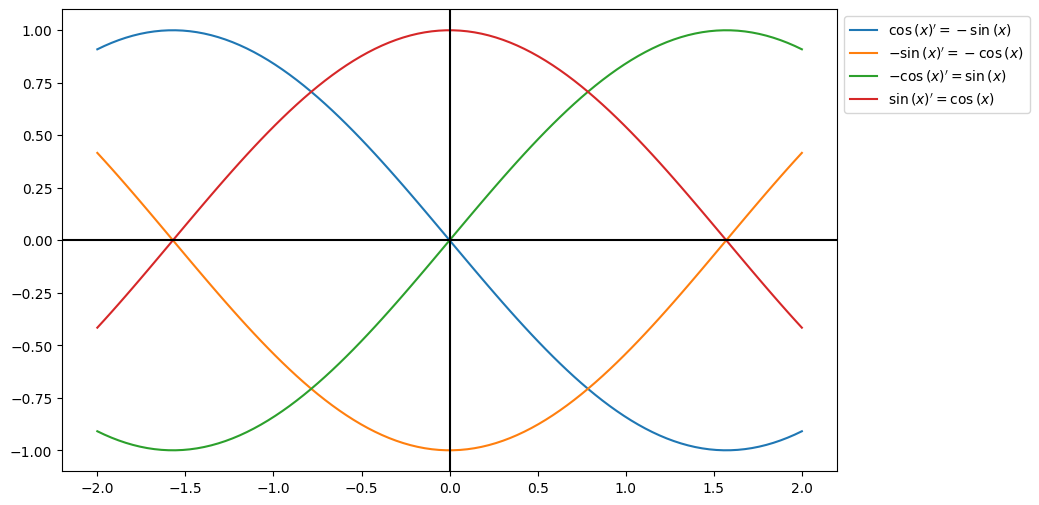

In [19]:
fx = sym.cos(x)

xx = np.linspace(-2,2,100)
plt.figure(figsize=(10,6),dpi=100)
for i in range(0,4):
    fxx = sym.lambdify(x,fx)
    
    dfx = sym.diff(fx)
    dfxx = sym.lambdify(x,dfx)
    display(Math("%s' = %s"  %(sym.latex(fx),sym.latex(dfx))))
    plt.plot(xx , dfxx(xx), label=f"${sym.latex(fx)}' = {sym.latex(dfx)}$")
    fx = dfx
    
plt.axhline(0, color='black')
plt.axvline(0, color='black');
plt.legend(bbox_to_anchor=[1,1,0,0]);


**Derivative trig functions exercise**

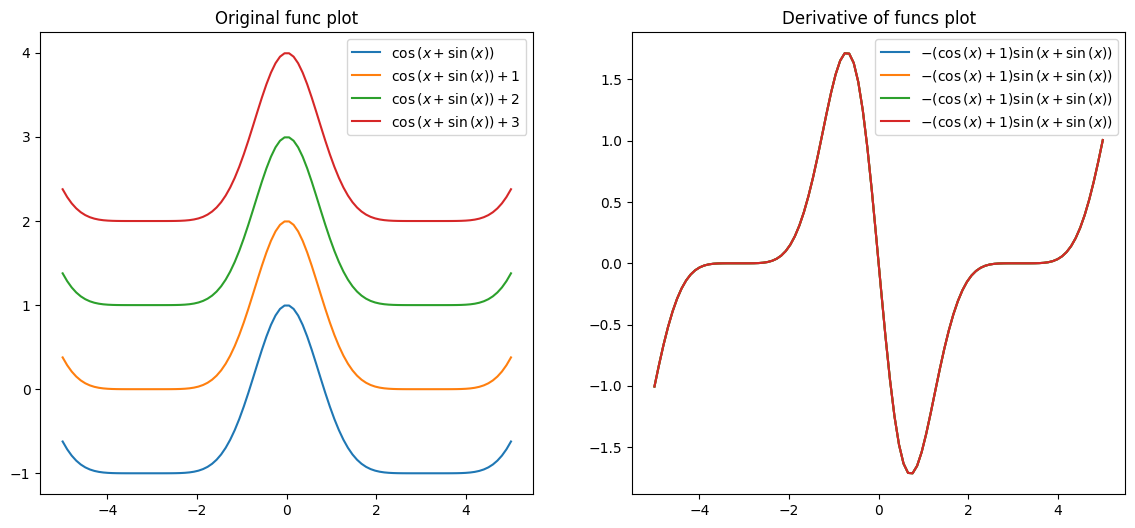

In [20]:
plt.figure(figsize=(14,6),dpi=100)

xx = np.linspace(-5,5,100)

for n in range(0,4):
    
    plt.subplot(1,2,1)
    fx = sym.cos(x + sym.sin(x)) + n
    fxx = sym.lambdify(x,fx)
    plt.plot(xx,fxx(xx),label=f"${sym.latex(fx)}$")
    plt.title("Original func plot")
    plt.legend()
    
    
    plt.subplot(1,2,2)
    dfx = sym.diff(fx)
    dfxx = sym.lambdify(x,dfx)
    plt.plot(xx,dfxx(xx),label=f"${sym.latex(dfx)}$" )
    plt.title("Derivative of funcs plot")
    
    plt.legend()
    

# <font color="red">**Tangent Lines: Concept and formula**</font>

$$ t = f'_{a}(x - x_{a}) +f_{a} $$

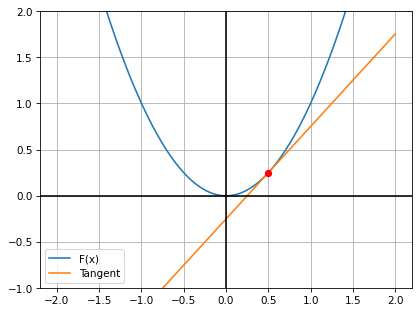

In [21]:
x = sym.symbols("x")

fx = x**2
dfx = sym.diff(fx)

# Value at which to compute the tangent line
xa = 0.5

# Get the function and derivative value at x_a
fa = fx.subs(x,xa)
dfa = dfx.subs(x,xa)

xx = np.linspace(-2,2,200)
fxx = sym.lambdify(x,fx)(xx)



t = dfa*(xx-xa) + fa

plt.plot(xx,fxx,label="F(x)");
plt.plot(xx,t, label="Tangent");
plt.plot(xa,fa,"ro")
plt.ylim(-1,2)
plt.grid(visible=True)
plt.axhline(0, color='black')
plt.axvline(0, color='black');
plt.legend();


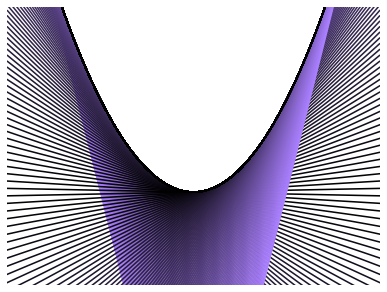

In [22]:
x = sym.symbols("x")

fx = x**2
dfx = sym.diff(fx)

# Value at which to compute the tangent line
xxa = np.linspace(-2,2,200)

for xa in xxa:
    # Get the function and derivative value at x_a
    fa = fx.subs(x,xa)
    dfa = dfx.subs(x,xa)

    xx = np.linspace(-2,2,200)
    fxx = sym.lambdify(x,fx)(xx)

    t = dfa*(xx-xa) + fa

    plt.plot(xx,fxx, color="k");
    plt.plot(xx,t, color=[abs(xa)/3,abs(xa)/4, abs(xa)/2]);
    plt.ylim(-1,2)
    plt.xlim(-2,2)
    plt.axis("off")



# <font color="red">**Critical points**</font>

When the derivative crosses "0", thats a critical point. (or where the derivative is undifined)

$$\text{Example :} $$
$$f(x) = -x^4 + 3x^2 $$
$$ f'(x) = -4x^3 + 6x $$
$$ \text{then set the derivative to f'(x)= 0} $$
$$ -4x^3 + 6x = 0 $$
$$ x = 0, \pm \sqrt{\frac{3}{2}} $$

In [23]:
from scipy.signal import find_peaks

The critical points are which are maximuns are:[-1.  1.]
Minimum is [0.]


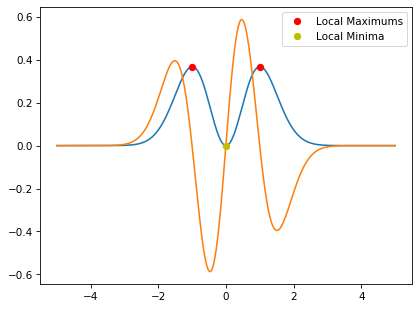

In [24]:
# empirical method
x = np.linspace(-5,5,1001)
fx = x**2 * np.exp(-x**2)
dfx = np.diff(fx) / (x[1] - x[0])

localmax = find_peaks(fx)[0]
localmin = find_peaks(-fx)[0]

print("The critical points are which are maximuns are:" + str(x[localmax]) + "\nMinimum is " + str(x[localmin]))

plt.plot(x,fx);
plt.plot(x[0:-1],dfx)
plt.plot(x[localmax], fx[localmax], "ro", label="Local Maximums")
plt.plot(x[localmin], fx[localmin], "yo", label="Local Minima");
plt.legend()

In [25]:
x = sym.symbols("x")
fx = x**2 * sym.exp(-x**2)

dfx = sym.diff(fx)
critpoints = sym.solve(dfx)  #solve for dfx = 0
critpoints

[-1, 0, 1]

**Critical point exercise**

Determine which values of <font color="red">a</font> give the function a critical value at x=1 or x=-2

$$ f(x,a) = x^2e^{-ax^2} $$
$$ a \in \text{\{0,0.25,0.5,..,2\}} $$

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

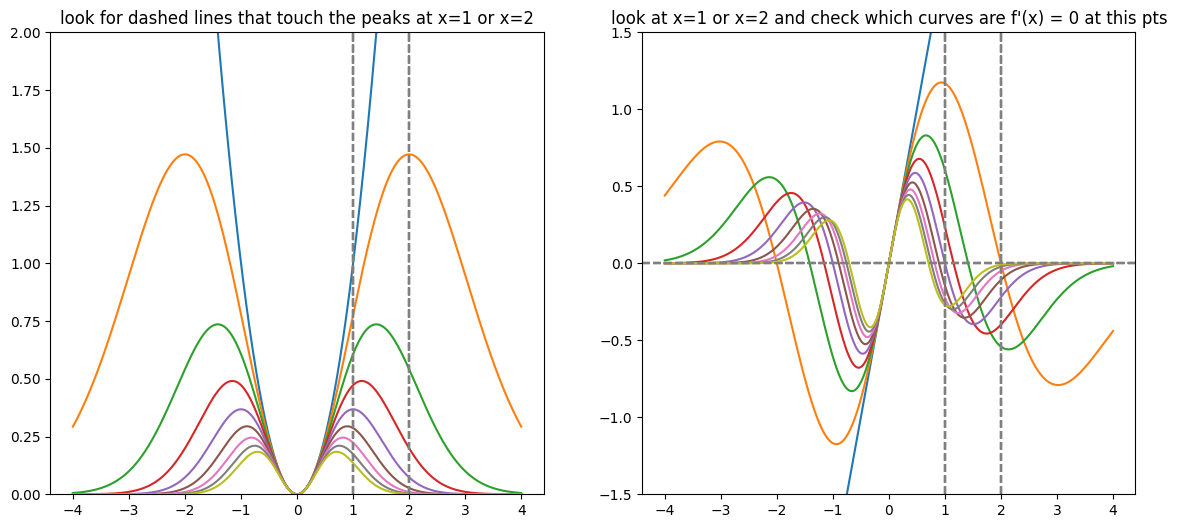

In [26]:
x , a = sym.symbols("x,a") 
fx = x**2 * sym.exp(-a*x**2)
dfx = sym.diff(fx,x)

xx = np.linspace(-4,4,1000)
aa = np.linspace(0,2,9)


plt.figure(figsize=(14,6),dpi=100)

for n in aa:
    
    fxx = fx.subs({a:n})
    dfxx = dfx.subs({a:n})
    
    critpoints = sym.solve(dfxx)
    
    if 2 in critpoints:
        display(Math("%s \\text{ has a critical point at x=2! Woohoo!!}" %(sym.latex(fxx))))
    elif 1 in critpoints:
        display(Math("%s \\text{ has a critical point at x=1! Woohoo!!}" %(sym.latex(fxx))))
    else:
        display(Math("%s \\text{ has NO critical point :(}" %(sym.latex(fxx))))
        
    
    fxxa = sym.lambdify(x,fxx)(xx)
    dfxxa = sym.lambdify(x,dfxx)(xx)
    
    plt.subplot(1,2,1)
    plt.plot(xx,fxxa)
    #plt.axhline(0, color='black')
    plt.axvline(2, color='gray', ls="--");
    plt.axvline(1, color='gray', ls="--");
    plt.ylim(0,2)
    plt.title("look for dashed lines that touch the peaks at x=1 or x=2")
    
    plt.subplot(1,2,2)
    plt.plot(xx,dfxxa)
    plt.ylim(-1.5,1.5);
    plt.axvline(2, color='gray', ls="--");
    plt.axvline(1, color='gray', ls="--");
    plt.axhline(0, color='gray', ls="--");
    plt.title("look at x=1 or x=2 and check which curves are f'(x) = 0 at this pts")
    
    
        
    
    

# <font color="red">**Partial derivatives**</font>

When are partial derivatives useful?<br>

When you have an equation with more than 1 variable<br>

example:<br>
$$ f(x,y) = 2xy^2 $$

the next one is the partial derivative of f with respect to x (have to treat y as constant):

$$ \frac{\partial{f}}{\partial{x}} = f_{x} = 2y^2 $$

next one is the partial derivative of f with respect to y (have to treat x as constant):

$$ \frac{\partial{f}}{\partial{y}} = f_{y} = 4xy $$

In [27]:
x,y = sym.symbols("x,y")

f = x**2 + x*y**2

display(Math("f(x,y) = %s"%(sym.latex(f))))
display(Math('\\frac{\\partial f}{\\partial x} = %s' %sym.latex(sym.diff(f,x))))
display(Math('\\frac{\\partial f}{\\partial y} = %s' %sym.latex(sym.diff(f,y))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [28]:
# p = sym.plotting.plot3d(f,(x,-3,3),title='$f(x,y)=%s$' %sym.latex(f))
# p = sym.plotting.plot3d(sym.diff(f,x),(x,-3,3),(y,-3,3),title='$f_x=%s$' %sym.latex(sym.diff(f,x)))
# p = sym.plotting.plot3d(sym.diff(f,y),(x,-3,3),(y,-3,3),title='$f_y=%s$' %sym.latex(sym.diff(f,y)))

In [29]:
from plotly.subplots import make_subplots
from plotly import graph_objects as go
warnings.simplefilter("ignore", category=DeprecationWarning)
x,y = sym.symbols("x,y")

f = x**2 + x*y**2


X, Y = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))

dfdx = sym.diff(f,x)
dfdy = sym.diff(f,y)

fxy = sym.lambdify([(x,y)],f)([X,Y])
dfdxx = sym.lambdify([(x,y)],dfdx)([X,Y])
dfdyy = sym.lambdify([(x,y)],dfdy)([X,Y])


fig = make_subplots(rows=1, cols=3,
                    specs=[[{'is_3d': True}, {'is_3d': True}, {'is_3d': True}]],
                    subplot_titles=['f(x,y)', 'dfdx',"dfdy"],
                    )

fig.add_trace(go.Surface(x=X, y=Y, z=fxy, colorbar_x=-0.07, colorscale="viridis"), 1, 1)
fig.add_trace(go.Surface(x=X, y=Y, z=dfdxx, showscale=True, colorbar_x=0.5, colorbar_y=-0.2, colorbar={"orientation":"h","thickness":7},
                        colorscale="rainbow"), 1, 2)
fig.add_trace(go.Surface(x=X, y=Y, z=dfdyy,colorscale="icefire"), 1, 3)
fig.update_layout(title_text="f(x,y) and its partial derivatives")
fig.show()

In [30]:
import plotly.graph_objects as go

x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)

#X, Y = x , y
X, Y = np.meshgrid(x, y)
Z = X**2 + X * Y**2

surface = go.Scatter3d(x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
                      mode='markers',
                      marker=dict(size=2, color=Z.flatten(),opacity=0.8, colorscale="viridis"))

layout = go.Layout(scene=dict(xaxis_title='x', yaxis_title='y', zaxis_title='z'))

fig = go.Figure(data=[surface], layout=layout)
fig.show()

# <font color="red">**Indefinite and definite integrals**</font>


$$ \text{Definite integral} \rightarrow    \int_a^b f(x) dx$$

$$ \text{indefinite integral of polynomials} \rightarrow \int {\color{green}b}x^{\color{red}a}dx = \frac{{\color{green}b}x^{{\color{red}a}+1}}{{\color{red}a}+1} + c $$

$$ \text{Example of indefinite integral} \rightarrow \int {\color{green}4}x^{\color{red}2}dx = \frac{{\color{green}4}x^{{\color{red}3}}}{{\color{red}3}} + c $$

The definite integral between 0 and 2 is: 2


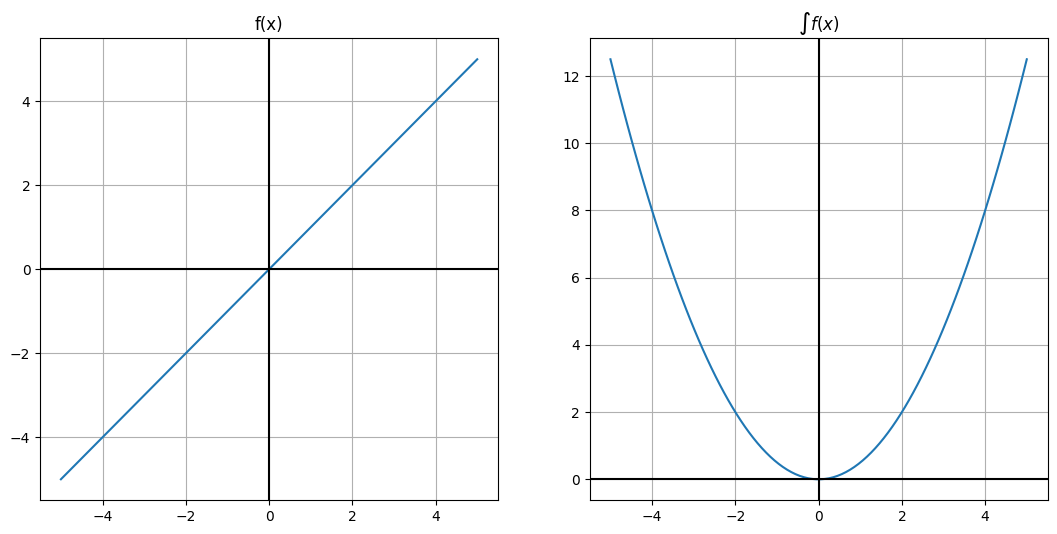

In [31]:
x = sym.symbols("x")

f = x

xx = np.linspace(-5,5,100)
#indefnite integral
f_int = sym.integrate(f) #doesnt include c constant. 

f_lamb = sym.lambdify(x,f)(xx)
f_int_lamb = sym.lambdify(x,f_int)(xx)

plt.figure(figsize=(13,6),dpi=100)

plt.subplot(1,2,1)
plt.plot(xx,f_lamb);
plt.title("f(x)");
plt.axhline(0, color='black')
plt.axvline(0, color='black');
plt.grid(visible=True)

plt.subplot(1,2,2)
plt.plot(xx,f_int_lamb);
plt.title("$\\int f(x)$");
plt.axhline(0, color='black')
plt.axvline(0, color='black');
plt.grid(visible=True);


#definite integrral between a and b.

lower_lim = 0
upper_lim = 2

print("The definite integral between %s and %s is: %s" %(lower_lim,upper_lim,sym.integrate(f,(x,lower_lim,upper_lim))))

The function is :


x**3/(x - 2)

The integral of the function is :


x**3/3 + x**2 + 4*x + 8*log(x - 2)

<lambdifygenerated-250>:2: RuntimeWarning:

invalid value encountered in log



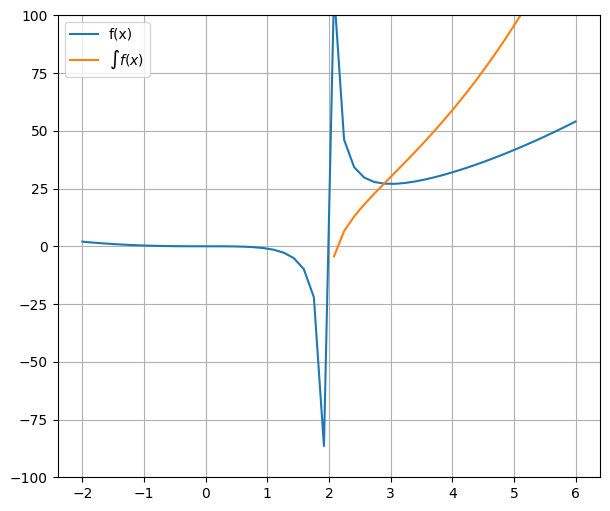

In [32]:
x = sym.symbols("x")

f = x**3 / (x-2)
f_int = sym.integrate(f)

print("The function is :")
display(f)

print("The integral of the function is :")
display(f_int)

xx = np.linspace(-2,6,50)
f_lamb = sym.lambdify(x,f)(xx)
f_int_lamb = sym.lambdify(x,f_int)(xx)

plt.figure(figsize=(7,6),dpi=100)
plt.plot(xx,f_lamb, label="f(x)")
plt.plot(xx,f_int_lamb,label="$\\int f(x)$");
plt.ylim([-100,100])
plt.legend()
plt.grid();

**Exercise**

Demonstrate that:

$$ \int f(x)'dx = f(x) $$

In [33]:
x = sym.symbols("x")

f = 2*x**3 + sym.sin(x)

left_side = sym.integrate(sym.diff(f,x))
print(left_side == f) 


display(Math(f"%s = %s "%(sym.latex(f),sym.latex(left_side))))

True


<IPython.core.display.Math object>

**Area between 2 curves**

$$ \int_a^b f(x)dx $$

$$ \text{Area between curves:} $$

$$ \int_a^b [f(x) - g(x)]dx $$



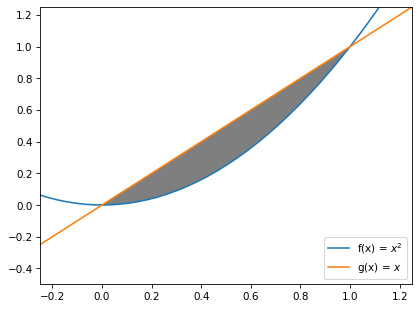

In [34]:
from matplotlib.patches import Polygon

x = sym.symbols("x")

f = x**2
g = x


xx = np.linspace(-2,2,100)

f_lamb = sym.lambdify(x,f)
g_lamb = sym.lambdify(x,g)

#add patch
xpatch = np.linspace(0,1,100)
ypatch = np.vstack((g_lamb(xpatch),f_lamb(xpatch))).T


fig, ax = plt.subplots()
ax.add_patch(Polygon(ypatch,facecolor="k",alpha=0.5))

plt.plot(xx,f_lamb(xx), label="f(x) = $%s$"%(sym.latex(f)))
plt.plot(xx,g_lamb(xx), label="g(x) = $%s$"%(sym.latex(g)));
plt.ylim([-0.5,1.25])
plt.xlim([-0.25, 1.25]);
plt.legend();

<font color="black" size="6">**Computing the area between two functions**</font>

$ \text{The area between two functions is given by the formula, } \large{A} = \int_a^b f(x) - g(x)dx $<br>
$ \text{In our example, } f(x) = x^2 \text{ and } g(x) = x$<br>
$ \text{Therefore, } \large{A} = \int_a^b(x^2 - x)dx $
$ \text{We will compute the area between the two crossing points, that is, where the two functions are equal, this is given by the two solutions to the equation:}$ 
$$x^2 = x $$
$ \text{The two solutions are x = 0 and x = 1. This gives of the definite integral of: }$
$$ \large{A} = \int_0^1 (x^2 - x)dx $$
$ \text{The final answer will be given in the code below.} $

In [35]:
intersect = f - g

intersect_pts = sym.solve(intersect)

area_between_curves = sym.integrate(intersect,(x, intersect_pts[0], intersect_pts[1]))
display(Math("\\text{The area between the curves is } %s"%(sym.latex(area_between_curves*-1))))

<IPython.core.display.Math object>

**Extra exercise**

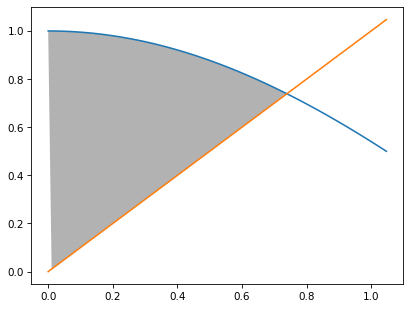

0.739085133215161
0.400488612113379
0.400487069552719


In [36]:
# Compute the area between two curves (not the same thing as Between Two Ferns)
from matplotlib.patches import Polygon


x = sym.symbols('x')
f1sym = sym.cos(x)
f2sym = x

xx = np.linspace(0,np.pi/3,100)
f1 = np.cos(xx)
f2 = xx

fintersect = np.argmin(abs(f1-f2))

A = sym.integrate(f1sym-f2sym,(x,xx[0],xx[fintersect]))

traceX = np.concatenate((xx[0:fintersect],xx[fintersect:0:-1]))
traceY = np.concatenate((f1[0:fintersect],f2[fintersect:0:-1]))

points = np.vstack((traceX,traceY)).T
p = Polygon(points,facecolor='k',alpha=.3)

fig, ax = plt.subplots()
ax.add_patch(p)

plt.plot(xx,f1, xx,f2)
plt.show()


intersect_pt = sym.nsolve(f1sym-f2sym,x,1)
print(intersect_pt)
print(sym.integrate(f1sym-f2sym,(x,xx[0], intersect_pt)))
print(A)